# Linear Regression - Coursera

This notebook presents the first week of the coursera Machine Learning class in Python.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Week 1

### Make an identity matrix

In [2]:
identity = np.zeros((3, 3))
np.fill_diagonal(identity, 1)

In [3]:
identity

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

### Load the data

In [4]:
data = np.loadtxt('data/coursera/ex1data1.txt', delimiter=',')

In [5]:
X = data[:, 0]
y = data[:, 1]

### Plot the data

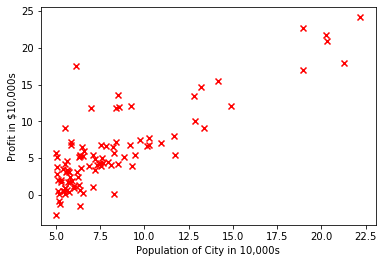

In [6]:
plt.scatter(X, y, marker='x', color='r')
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.show()

On the figure above, we can see the distribution of our data.

As we can see, it looks like it could be estimated with a simple Linear Regression. 

### Compute cost (Linear Regression)

As a reminder, the objective of linear regression is to minimize the cost function : 

\begin{equation*}
J(\theta) = \frac{1}{2m} \sum_{i=1}^m(h_\theta(x^i) - y^i)²
\end{equation*}

It corresponds to the squarred error of the model : for each point of the training data, we compare the hypothesis $h_\theta$ with the actual point $y^i$.

The linear model's hypothesis $h_\theta$ corresponds to : 

\begin{equation*}
h_\theta(x) = \theta^Tx = \theta_0 + \theta_1x_1
\end{equation*}

With : $\theta$ corresponding to the parameters of the model. 
 
These are the values being adjusted to minimize the cost $J(\theta)$

We adjust the values of $\theta$ with the **batch gradient descent algorithm** (which is one way of doing it).

In batch gradient descent, each iteration performs the update : 

\begin{equation*}
\theta_j := \theta_j - \alpha \frac{1}{m}\sum_{i=1}^m(h_\theta(x^i) - y^i)x_j^i
\end{equation*}

With each step of gradient descent, the parameters $\theta_j$ come closer to the optimal values that will achieve the lowest cost $J(\theta)$.

In [7]:
ones = np.ones((len(y), 1))

In [8]:
X = data[:, 0]
X = X.reshape((len(y), 1))

In [9]:
X = np.concatenate((ones, X), axis=1)

In [10]:
theta = np.zeros((2, 1))
iterations = 1500
alpha = 0.01

Below is the function computing the cost : 

\begin{equation*}
J(\theta) = \frac{1}{2m} \sum_{i=1}^m(h_\theta(x^i) - y^i)²
\end{equation*}

In [11]:
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X @ theta
    predictions = predictions.reshape((len(predictions), ))
    
    squarred_error = np.power((predictions - y), 2)
    cost_J = 1/(2*m) * squarred_error.sum() 
    return cost_J

In [12]:
compute_cost(X, y, theta)

32.072733877455676

In [13]:
compute_cost(X, y, np.array([-1, 2]))

54.24245508201238

### Compute Gradient Descent (Linear Regression)

Below is the function computing gradient descent : 

\begin{equation*}
\theta_j := \theta_j - \alpha \frac{1}{m}\sum_{i=1}^m(h_\theta(x^i) - y^i)x_j^i
\end{equation*}

In [14]:
def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = np.zeros((num_iters, 1))
    for i in range(num_iters):
        cost = compute_cost(X, y, theta)
        J_history[i] = cost
        
        predictions = X @ theta
        predictions = predictions.reshape((m, ))
        hypothesis = (X.transpose() @ (predictions - y))
        
        x = (alpha/m) * hypothesis
        x =  x.reshape((2, 1))
        
        theta = theta - x
    return J_history, theta

In [15]:
history, theta_opti = gradient_descent(X, y, theta, alpha, num_iters=iterations)

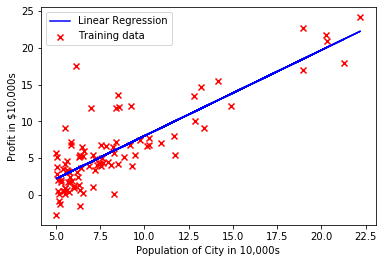

In [16]:
plt.scatter(X[:, 1], y, marker='x', color='r', label='Training data')
plt.plot(X[:, 1], X@theta_opti, color='b', label='Linear Regression')
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.legend()
plt.show()

### Visualising the cost J(theta)

In [17]:
from mpl_toolkits.mplot3d import Axes3D

In [18]:
theta_0 = np.linspace(-10, 10, 100)
theta_1 = np.linspace(-1, 4, 100)

J_values = np.zeros((len(theta_0), len(theta_1)))

In [19]:
for i in range(len(theta_0)):
    for j in range(len(theta_1)):
        current_theta = np.array([theta_0[i], theta_1[j]])
        J_values[i, j] = compute_cost(X, y, current_theta)

#### Surface plot

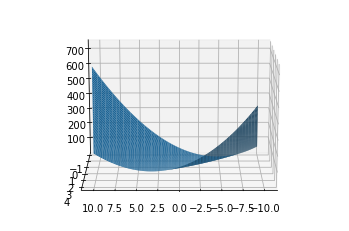

In [20]:
fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(theta_0, theta_1, J_values)
ax.view_init(15, 90)
plt.show()